In [15]:
%pylab inline
from qutip import *
#from tqdm import tqdm_notebook
from scipy.constants import h, hbar, k as kb
from itertools import product
from scipy import optimize
from importlib import reload
#from ReadoutResonator import *
#from tqdm import tqdm_notebook as tqdm
#from tqdm import tnrange, tqdm_notebook
import pickle
# import cython
# cython.language_level = '2'
import logging
logging.getLogger().setLevel(logging.WARNING)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import Transmon
reload(Transmon)
from Transmon import *

import TransmonControl
reload(TransmonControl)
from TransmonControl import *

import DoubleTransmonSystem
reload(DoubleTransmonSystem)
from DoubleTransmonSystem import *

import Dynamics
reload(Dynamics)
from Dynamics import *

Populating the interactive namespace from numpy and matplotlib


/usr/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['log2', 'identity', 'sqrt', 'arcsin', 'info', 'arccos', 'squeeze', 'power', 'entropy', 'fft', 'shape', 'log10', 'log', 'arctanh', 'show_config', 'test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [16]:
## Double Transmon System parameters (manually fitted with care)
Nc = 7

Ec1 = 0.22 *2* np.pi
Ec2 = 0.23 *2* np.pi
Ecc = 0.005/1.2**2 * 2 * np.pi # 1.2 is my estimate for n_{ge} matrix element
Ej1 = 23.87 *2* np.pi
Ej2 = 17.56 *2* np.pi
d = 0.7

T1_1, T2_1 = 10e3, 5e3
T1_2, T2_2 = 5e3, 1e3

tr1 = Transmon(Ec1, Ej1, d, 1/T1_1, 1/T2_1, Nc)
tr2 = Transmon(Ec2, Ej2, d, 1/T1_2, 1/T2_2, Nc)

#TC = TransmonControl(tr1)
dts = DoubleTransmonSystem(tr1, tr2, Ecc)

SweetSpot1 = 4.14 #4.14
SweetSpot2 = 4.12

T1 = 11.0 #higher "\/" #11.1 #periods of the spectrum curves
T2 = 6.4 #lower "/\    #6.4 

In [17]:
dyn = Dynamics(dts, SweetSpot1, SweetSpot2,T1, T2, 0.1, 2e4) #Dymanics(..., amp, dur)

In [21]:
A = dyn.run(20,20) #points chosen with 

Requested number of CPUs (8) is larger than physical number (4).
Reduce 'num_cpus' for greater performance.


In [19]:
dyn.f_list

array([  0,  21,  42,  63,  84, 105, 126, 147, 168, 189, 210, 231, 252,
       273, 294, 315, 336, 357, 378, 400])

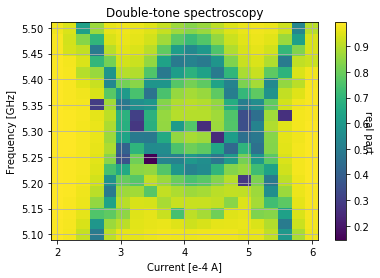

In [20]:
dyn.plot(0)
#plt.colorbar(use_gridspec = True)
#plt.tight_layout()